Välkommen till Värdepappersanalys i Python!

I den här kursen så kommer vi att blablabla

Kom igång med python:

In [1]:
# Det här är en kommentar. Allt efter fyrkanten är osynligt för datorn
# Vi använder dem för att kunna lämna medelanden till den som läser koden
# Nu sätter vi igång!
# Det första man lär sig när man programmerar är att skriva ett hello-world-program
# Ett sådant ser ut såhär
print("Hello world!")
# Prova att köra den här koden genom att markera den här rutan och trycka på "shift" och "enter" samtidigt
# Se vad som händer!

Hello world


In [2]:
# print() är en inbyggd funktion som skriver ut saker så att vi kan läsa det
# I python är det skillnad på gemener och versaler
# Prova att köra den här cellen
# Vad händer?
Print("Hello world!")

NameError: name 'Print' is not defined

In [ ]:
# När du körde cellen ovan så fick du ett felmeddelande
# Notera hur mycket information om felet felmeddelandet ger dig
# Vet du inte hur du ska lösa felet?
# Gör då såhär:
# 1: Läs felmeddelandet
# 2: Googla sista raden av felmeddelandet + "python", läs på stackoverflow!
# 3: Fråga någon och be om hjälp

#Prova att skriva ut ditt eget namn i den här cellen!


Värdepappersanalys

In [1]:
# pip install https://github.com/matplotlib/mpl_finance/archive/master.zip
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
style.use("ggplot")

In [4]:
ticker = "^OMX"

In [16]:
start = dt.datetime(2018, 5, 14)
end = dt.datetime.now()
df = web.DataReader(ticker, "yahoo", start, end)
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)
df.to_csv(ticker + ".csv")

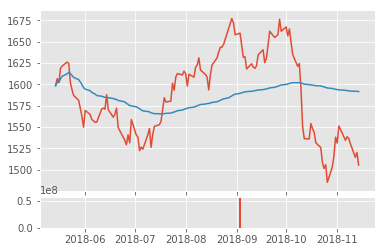

In [17]:
df = pd.read_csv(ticker + ".csv", parse_dates=True, index_col=0)
df["50ma"] = df["Adj Close"].rolling(window=100, min_periods=0).mean()

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df["Adj Close"])
ax1.plot(df.index, df["50ma"])
ax2.bar(df.index, df["Volume"])

plt.show()

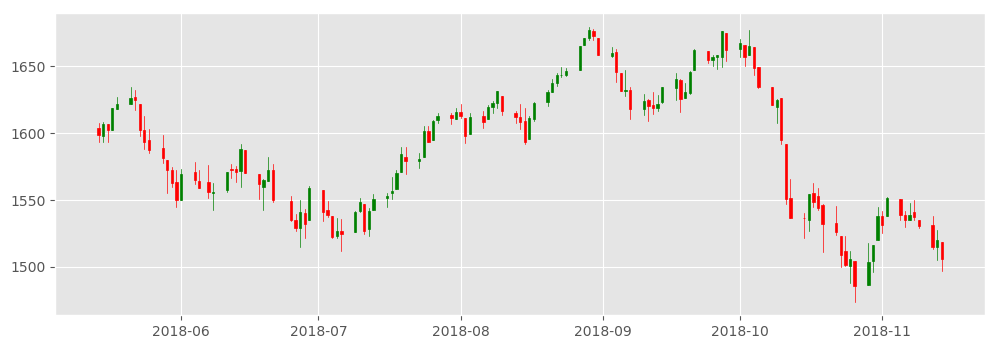

In [19]:
df_ohlc = df.resample('1D').agg({ 'Open': 'first', 
                        'High': 'max', 
                        'Low': 'min', 
                        'Close': 'last' })

df_ohlc.reset_index(inplace=True)
df_ohlc["Date"] = df_ohlc["Date"].map(mdates.date2num)

fig = plt.figure(figsize=(12, 4), dpi=100)
ax1 = fig.add_subplot(111)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=0.5, colorup="g")

plt.show()